In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc=cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
sudo: invalid option -- 'f'
usage: sudo -h | -K | -k | -V
usage: sudo -v [-ABknS] [-g group] [-h host] [-p prompt] [-u user]
usage: sudo -l [-ABknS] [-g group] [-h host] [-p prompt] [-U user] [-u user]
            [command]
usage: sudo [-ABbEHknPS] [-r role] [-t type] [-C num] [-D directory] [-g group]
            [-h host] [-p prompt] [-R directory] [-T timeout] [-u user]
            [VAR=value] [-i|-s] [<command>]
usage: sudo -e [-ABknS] [-r role] [-t type] [-C num] [-D directory] [-g group]
            [-h host] [-p prompt] [-R directory] [-T timeout] [-u user] file ...


In [ ]:
import pandas as pd
src_data = pd.read_csv('의사결정나무_과일종류_2가지.csv', encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


In [ ]:
#Step 3.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다

data = src_data[['무게','길이']].to_numpy()
target = src_data['종류'].to_numpy()

print(data)
print(target)

# train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [1900.    19. ]
 [ 600.     9. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     9.5]
 [ 550.     8.5]]
['수박' '수박' '수박' '수박' '수박' '수박' '참외' '참외' '참외' '참외' '참외' '참외']


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape)

(9, 2) (9,)
(3, 2)


In [ ]:
# Step 4.훈련용 데이터로 모델 생성후 테스트용 데이터로 모델을 검증합니다.

# 의사결정나무 분류기 생성
from sklearn import tree
clf = tree.DecisionTreeClassifier()

# 학습
clf = clf.fit(X_train, y_train)
# score 출력
print(clf.score(X_test, y_test))

# 예측 : 수박이 나오면 성공
clf.predict([[1500,15]])

1.0


array(['수박'], dtype=object)

In [ ]:
# split하지 않은 데이터로 모델 훈련 다시 진행(판단 과정을 그림으로 확인하기 위함)

clf.fit(data,target)

DecisionTreeClassifier()

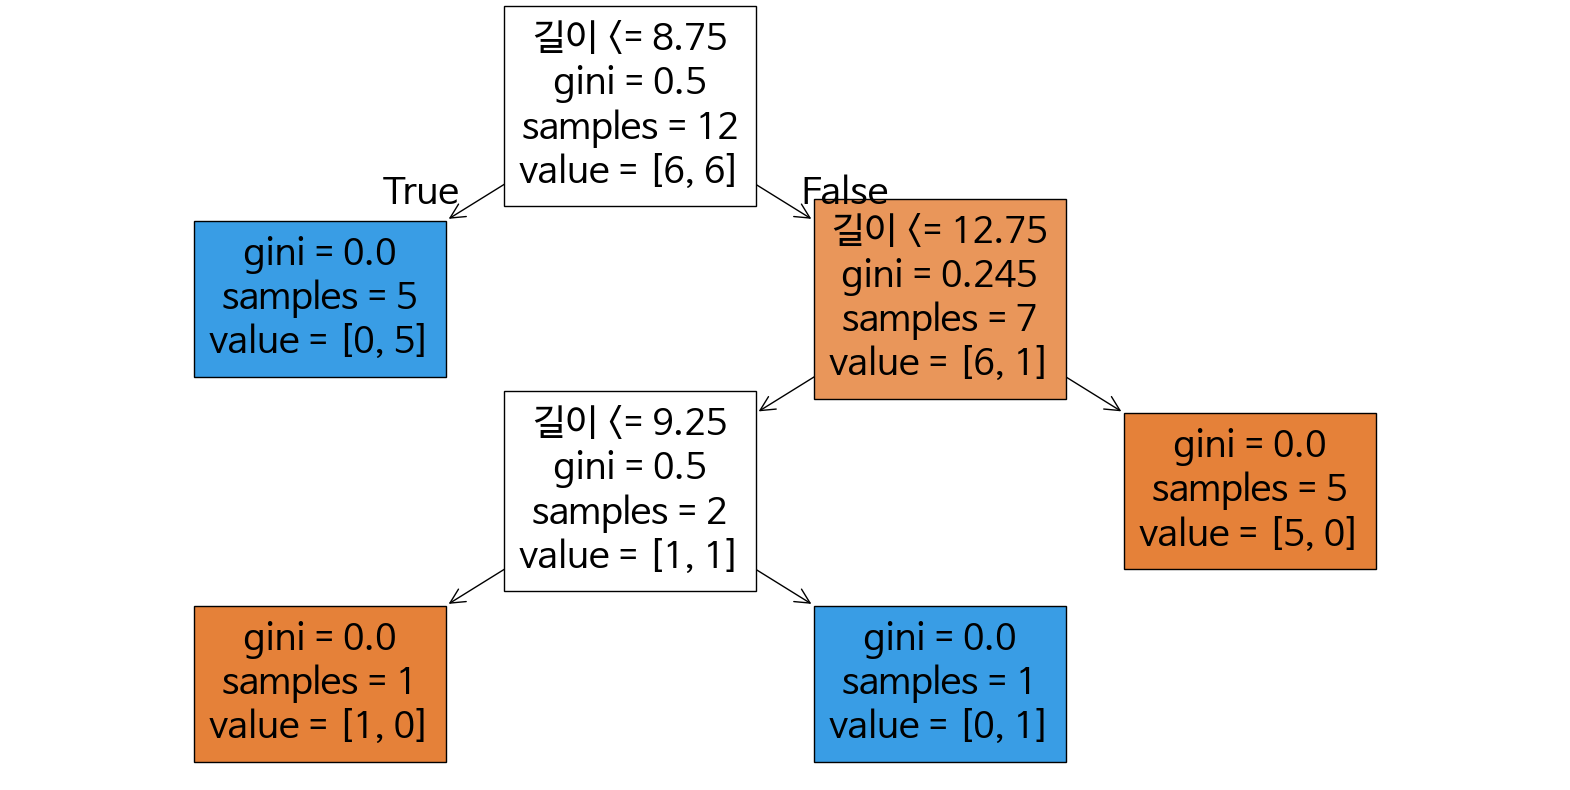

In [ ]:
#Step 5. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, max_depth=5, filled=True, feature_names=['무게','길이'])

plt.show()

#앙상블_랜덤포레스트_과일종류맞추기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc=cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
src_data2 = pd.read_csv('과일채소목록.csv', encoding='cp949')
src_data2

,종류,무게_g,길이_cm,색상,당도
0,수박,2000,30.0,1,8.0
1,수박,2500,25.0,1,7.0
2,수박,1800,20.0,1,6.5
3,수박,1500,16.0,1,8.5
4,수박,2200,21.0,1,9.5
5,자두,100,3.5,3,6.0
6,자두,120,3.7,3,7.0
7,자두,90,2.8,3,8.0
8,자두,150,3.8,3,8.5
9,자두,110,3.6,3,7.5


In [ ]:
#Step 3. 훈련용 세트와 테스트용 세트로 나눕니다.
# '무게_g','길이_cm','색상','당도'에 따른 과일종류 분류

data = src_data2[['무게_g','길이_cm','색상','당도']]
target = src_data2['종류']

# train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

In [ ]:
print(X_train.shape, y_test.shape)
print(X_train)
print(y_train)

(40, 4) (10,)
    무게_g  길이_cm  색상   당도
39   601    8.6   2  8.1
2   1800   20.0   1  6.5
40   451   20.1   1  3.1
32    91    2.9   3  8.1
10   500    8.0   2  8.0
21   250   25.0   3  7.5
35   501    8.1   2  8.1
27  1801   20.1   1  6.6
18   400   23.0   1  1.0
31   121    3.8   3  7.1
1   2500   25.0   1  7.0
12   450    8.0   2  7.5
34   111    3.7   3  7.6
45   281   28.1   3  8.1
26  2501   25.1   1  7.1
5    100    3.5   3  6.0
13   400    6.5   2  6.5
22   220   22.0   3  7.0
19   350   20.0   1  1.3
17   380   22.0   1  1.5
14   600    8.5   2  8.0
4   2200   21.0   1  9.5
41   501   25.1   1  2.1
33   151    3.9   3  8.6
24   290   29.0   3  9.0
11   400    7.5   2  7.2
38   401    6.6   2  6.6
16   500   25.0   1  2.0
48   271   26.1   3  8.6
46   251   25.1   3  7.6
49   291   29.1   3  9.1
8    150    3.8   3  8.5
43   401   23.1   1  1.1
29  2201   21.1   1  9.6
25  2001   30.5   1  8.1
28  1501   16.1   1  8.6
0   2000   30.0   1  8.0
15   450   20.0   1  3.0
36   401   

In [ ]:
# 랜덤 포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# 학습
rfc.fit(X_train, y_train)

# 예측
print(rfc.predict(X_test))

# score
print(rfc.score(X_test, y_test))

['참외' '거봉포도' '옥수수' '옥수수' '거봉포도' '거봉포도' '수박' '자두' '자두' '자두']
1.0


In [ ]:
# 테스트 데이터 확인
print(y_test)

37      참외
23    거봉포도
44     옥수수
42     옥수수
47    거봉포도
20    거봉포도
3       수박
30      자두
7       자두
6       자두
Name: 종류, dtype: object


In [ ]:
# 예측결과 데이터프레임을 만들고
예측결과 = pd.DataFrame(rfc.predict(X_test), columns=['예측결과'])
# concat을 통해 기존 테스트 data와 예측결과 데이터를 합친다.
result = pd.concat([X_test.reset_index(drop=True), 예측결과], axis=1)
result

,무게_g,길이_cm,색상,당도,예측결과
0,451,8.1,2,7.6,참외
1,270,26.0,3,8.5,거봉포도
2,351,20.1,1,1.4,옥수수
3,381,22.1,1,1.6,옥수수
4,221,22.1,3,7.1,거봉포도
5,280,28.0,3,8.0,거봉포도
6,1500,16.0,1,8.5,수박
7,101,3.6,3,6.1,자두
8,90,2.8,3,8.0,자두
9,120,3.7,3,7.0,자두


In [ ]:
# k-fold 교차 검증
import numpy as np
from sklearn.model_selection import cross_validate

# return_train_score= True --> 학습시 score점수를 누적해서 반환
# n_jobs : 동시에 실행되는 갯수 : -1자동 지정
# 코어
scores = cross_validate(rfc, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


중요속성지표값 [0.36657728 0.23175091 0.24988716 0.15178464]


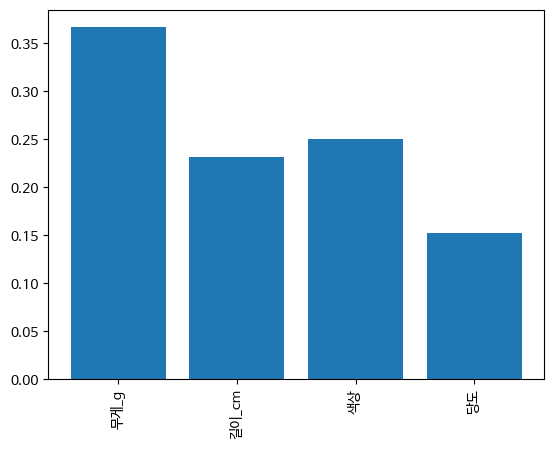

In [ ]:
# 중요 속성 지표값 출력

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


imp = rfc.feature_importances_
print('중요속성지표값', imp)

plt.figure()
plt.bar(range(len(imp)),imp)
plt.xticks(range(len(imp)), data.columns, rotation=90)
plt.show()

# [연습문제] 의사결정나무_붓꽃

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
flower = pd.read_csv('붓꽃_최종.csv', encoding='cp949')
flower

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,레이블,품종
0,4.6,3.1,1.5,0.2,0,setosa
1,5.0,3.6,1.4,0.2,0,setosa
2,5.4,3.9,1.7,0.4,0,setosa
3,4.6,3.4,1.4,0.3,0,setosa
4,5.0,3.4,1.5,0.2,0,setosa
...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2,virginica
143,6.3,2.5,5.0,1.9,2,virginica
144,6.5,3.0,5.2,2.0,2,virginica
145,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   147 non-null    float64
 1   꽃받침넓이   147 non-null    float64
 2   꽃잎길이    147 non-null    float64
 3   꽃잎넓이    147 non-null    float64
 4   레이블     147 non-null    int64  
 5   품종      147 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.0+ KB


In [ ]:
flower.describe()

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,레이블
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.862585,3.053741,3.806803,1.219728,1.020408
std,0.824971,0.438596,1.749390,0.756310,0.814840
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data = flower[['꽃받침길이', '꽃받침넓이', '꽃잎길이', '꽃잎넓이']].to_numpy()
target = flower['품종'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

In [ ]:
print(X_train.shape, X_test.shape)

(117, 4) (30, 4)


In [ ]:
# 훈련 데이터와 테스트데이터로 모델 검증합니다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=10)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9658119658119658
0.9666666666666667


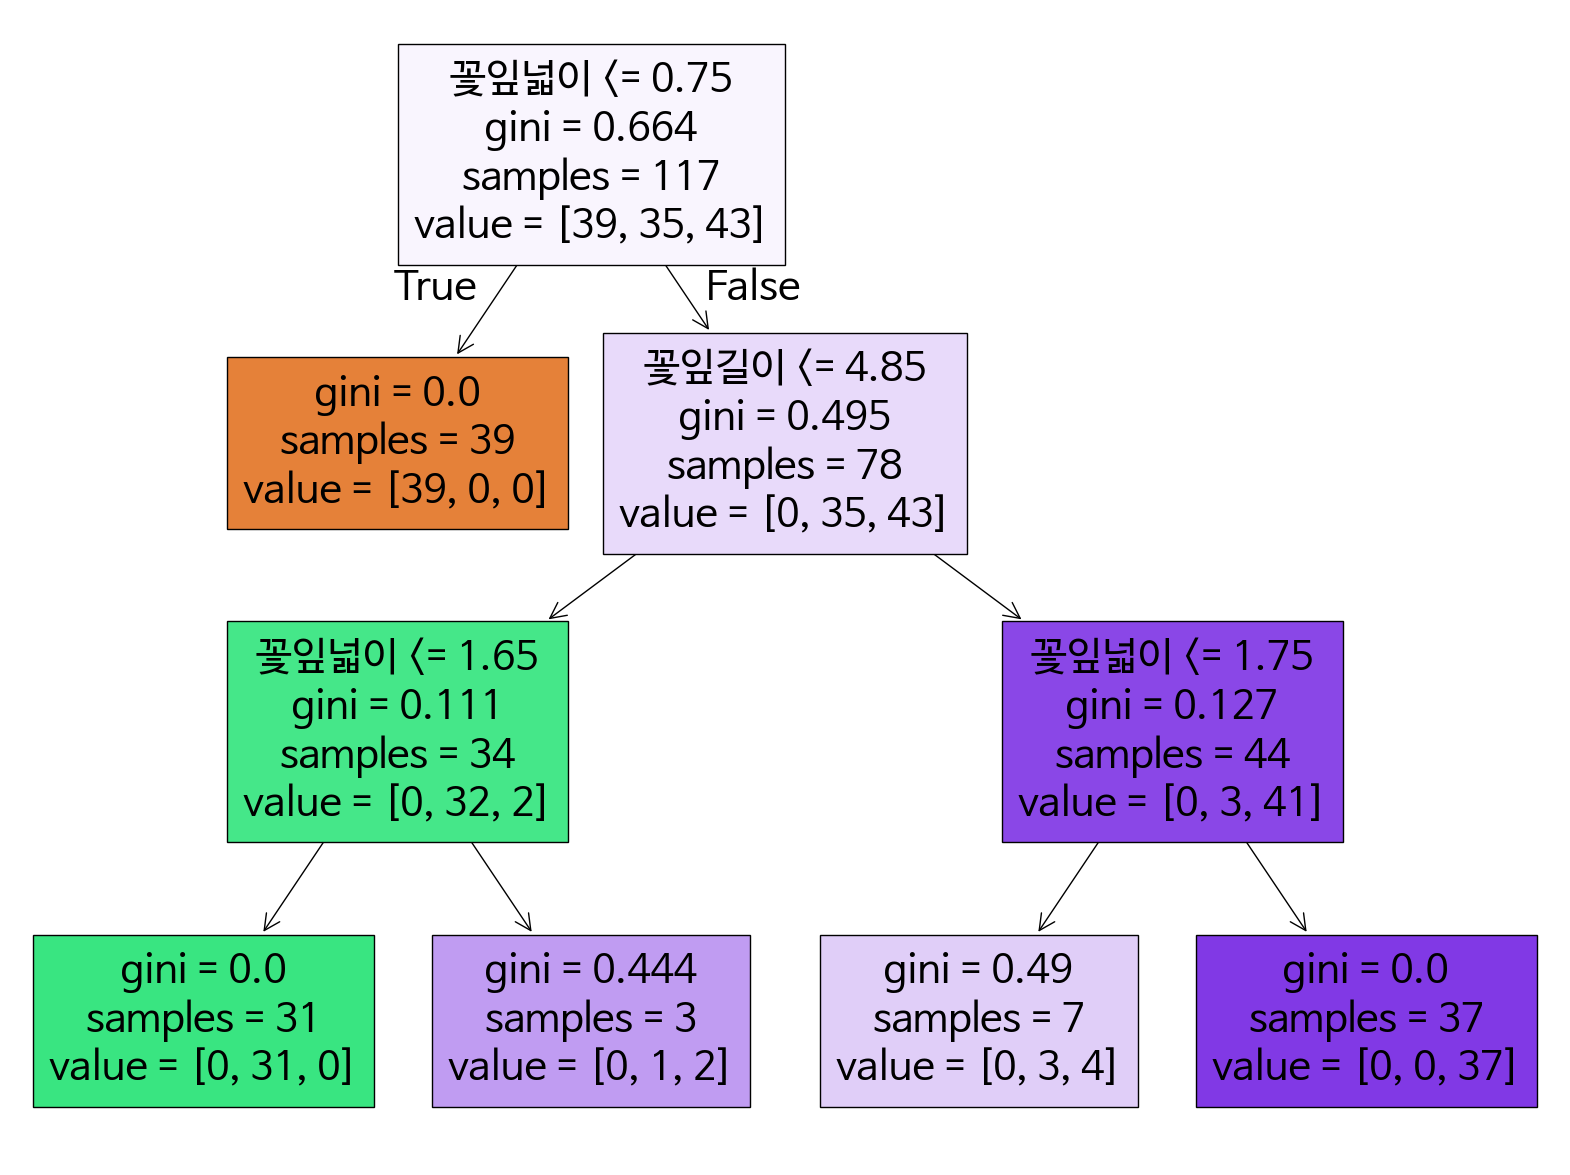

In [ ]:
#Step 6. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['꽃받침길이', '꽃받침넓이', '꽃잎길이', '꽃잎넓이'])
plt.show()

# [연습문제] 의사결정나무_생선

In [ ]:
!sudo apt-get install -y fonts_nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd

fish = pd.read_csv('fish.csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# 무게, 길이, 높이 넓이 정보를 가지고, 생선의 종류 예측
import numpy as np
data = fish[['Weight', 'Length', 'Height', 'Width']].to_numpy()
target = fish['Species'].to_numpy()

# train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)


# train, test 데이터 shape 확인
print(X_train.shape, X_test.shape)

(127, 4) (32, 4)


In [ ]:
# 의사결정나무 import
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt = DecisionTreeClassifier(max_depth=3, random_state=10)

# 모델 학습
dt.fit(X_train, y_train)

# train, test데이터에 대해 score 출력
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.6850393700787402
0.65625


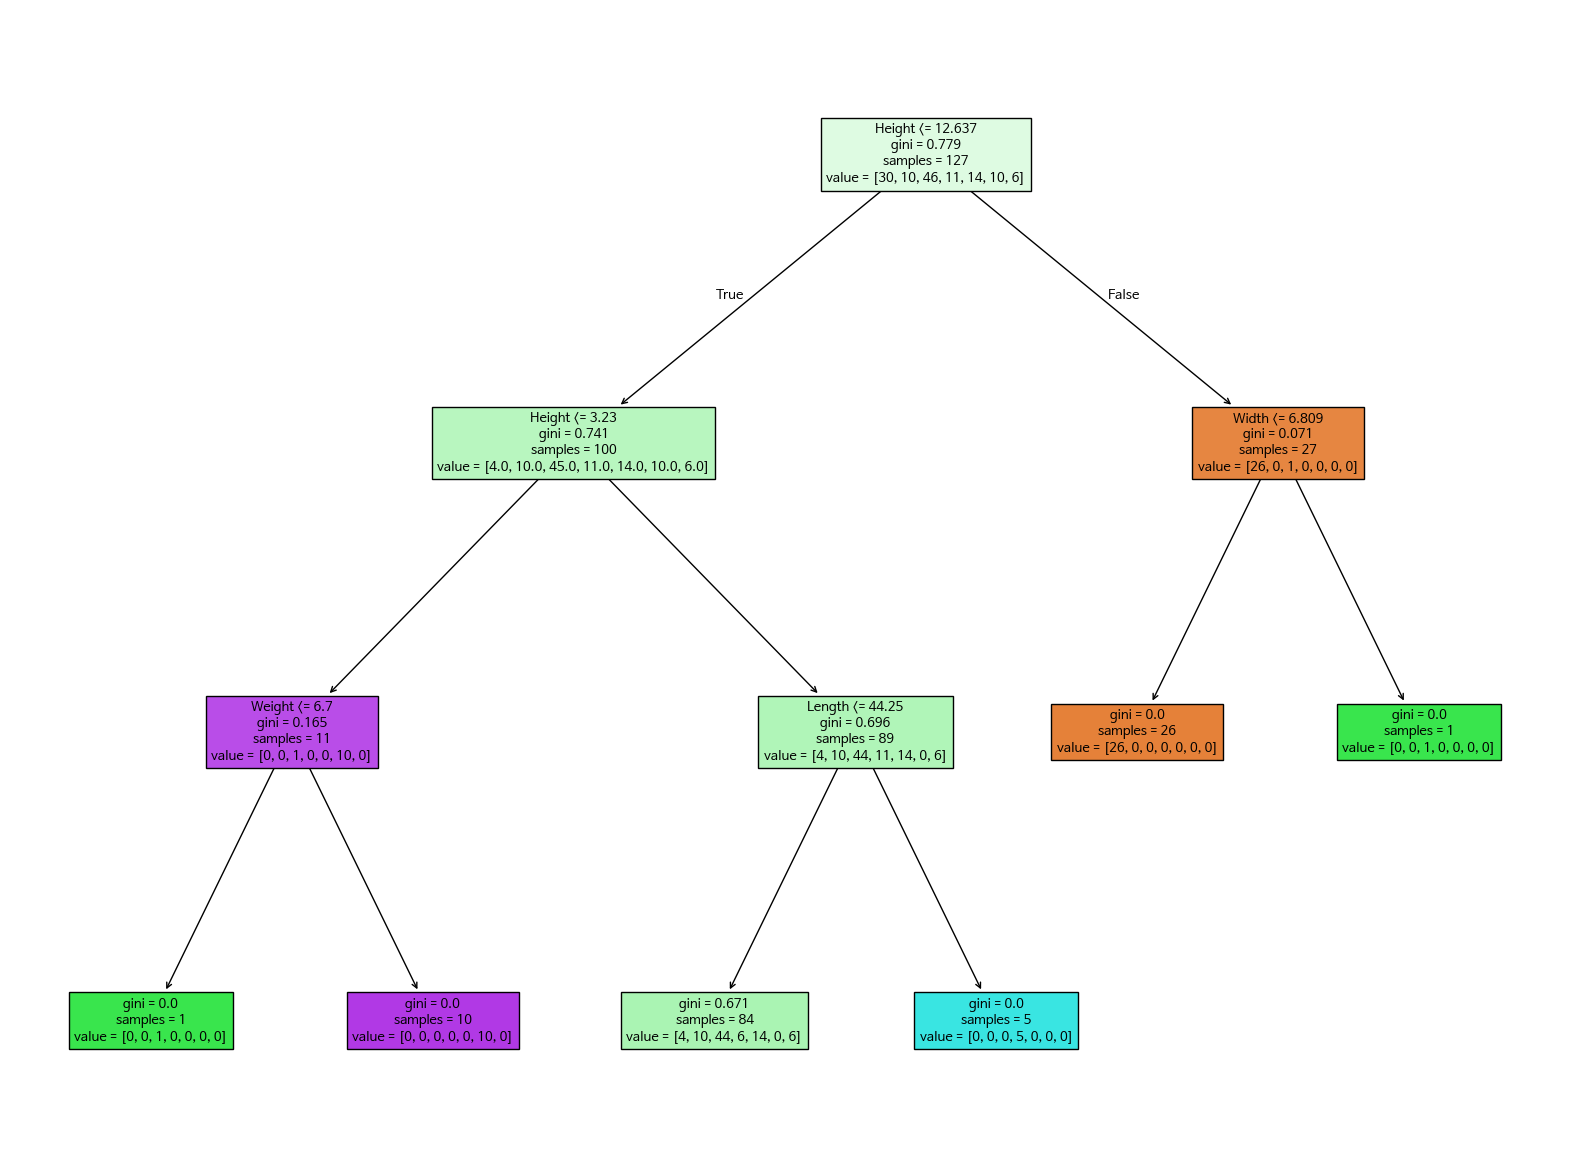

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Weight','Length','Height','Width'])
plt.show()

# 그리드서치

In [ ]:
import pandas as pd
src_data = pd.read_csv('의사결정나무_과일종류_2가지.csv',encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


In [ ]:
#Step 3.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다
import numpy as np

data = src_data[['무게','길이']].to_numpy()
target = src_data['종류'].to_numpy()

print(data)
print(target)

# train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [1900.    19. ]
 [ 600.     9. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     9.5]
 [ 550.     8.5]]
['수박' '수박' '수박' '수박' '수박' '수박' '참외' '참외' '참외' '참외' '참외' '참외']


In [ ]:
# GridSearch, DecisionTree import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 찾고 싶은 파라미터 입력
parm = {'max_depth' : range(1, 10, 1), 'min_samples_split' : range(2, 20, 1)}

# 의사결정트리에 그리드 서치 적용
gs = GridSearchCV(DecisionTreeClassifier(random_state=50), parm, n_jobs=-1)

# 그리드서치 학습
gs.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(2, 20)})

In [ ]:
# 최고의 성능을 보인 파라미터 출력
print(gs.best_params_)

# dt에 최고 성능 모델 복사
dt = gs.best_estimator_

# 훈련용_data로 dt의 score 출력
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

{'max_depth': 1, 'min_samples_split': 2}
0.8888888888888888
1.0


In [ ]:
# 한꺼번에 여러 속성값을 찾을 경우

# 찾고싶은 파라미터 모두 정의
parm1 = parm = {'max_depth' : range(1, 10, 1), 'max_features' : [2] , 'min_samples_leaf' : [1], 'min_samples_split' : range(2, 20, 1)}

# 의사결정트리에 그리드 서치 적용
gs1 = GridSearchCV(DecisionTreeClassifier(random_state=50), parm1, n_jobs=-1)


# 그리드서치 학습
gs1.fit(X_train, y_train)

# 최고의 성능을 보인 파라미터 출력
print(gs1.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# 그리드 서치 과정에서 진행한 교차검증 점수중 최고값을 확인하기
dt = gs1.best_estimator_
print(dt)

DecisionTreeClassifier(max_depth=1, max_features=2, random_state=50)


In [ ]:
# 최적의 모델로 테스트용 데이터로 최종 테스트하기
dt = DecisionTreeClassifier(max_depth=1, max_features=2, random_state=50)
dt.fit(X_train, y_train)


# 훈련용, 테스트용 데이터로 수행한 score 출력
print(dt.score(X_train , y_train))
print(dt.score(X_test , y_test))

0.8888888888888888
1.0


#[연습문제] 그리드서치튜닝_와인

In [ ]:
!sudo apt-get install -y fonts_nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd

wine1 = pd.read_csv('와인.csv', encoding='cp949')
wine1

,알콜도수,당도,산도_ph,종류
0,9.4,1.9,3.51,레드와인
1,9.8,2.6,3.20,레드와인
2,9.8,2.3,3.26,레드와인
3,9.8,1.9,3.16,레드와인
4,9.4,1.9,3.51,레드와인
...,...,...,...,...
6492,11.2,1.6,3.27,화이트와인
6493,9.6,8.0,3.15,화이트와인
6494,9.4,1.2,2.99,화이트와인
6495,12.8,1.1,3.34,화이트와인


In [ ]:
# 알콜도수, 당도, 산도_ph를 통해 종류 분류
data =  wine1[['알콜도수','당도','산도_ph']].to_numpy()
target = wine1['종류'].to_numpy()

print(data)
print(target)

# train, text 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=50)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]
['레드와인' '레드와인' '레드와인' ... '화이트와인' '화이트와인' '화이트와인']


In [ ]:
#Step 4. GradientBoostiongClassifier 모델 생성
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=10)
# 학습
gbc.fit(X_train, y_train)

# score 출력
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8795458918606889
0.8684615384615385


In [ ]:
# 그리드서치 활용하여 하이퍼라파미터 튜닝 - LGB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# 파라미터 설정
parms = {'max_depth' : range(1,10,1), 'min_samples_split' : range(2,20,1)}

#그리드 서치 객체 생성
gscv = GridSearchCV(DecisionTreeClassifier(random_state = 50), parms, n_jobs=-1)

# 학습
gscv.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 값 출력
print(gscv.best_params_)

# 정확도 출력
dt = gscv.best_estimator_

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

{'max_depth': 6, 'min_samples_split': 2}
0.8724263998460651
0.8746153846153846


#[연습문제]_K_Fold와_그리드서치_와인

In [ ]:
import pandas as pd
wine = pd.read_csv('와인.csv', encoding='cp949')
wine

,알콜도수,당도,산도_ph,종류
0,9.4,1.9,3.51,레드와인
1,9.8,2.6,3.20,레드와인
2,9.8,2.3,3.26,레드와인
3,9.8,1.9,3.16,레드와인
4,9.4,1.9,3.51,레드와인
...,...,...,...,...
6492,11.2,1.6,3.27,화이트와인
6493,9.6,8.0,3.15,화이트와인
6494,9.4,1.2,2.99,화이트와인
6495,12.8,1.1,3.34,화이트와인


In [ ]:
# Step 2.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다
import numpy as np

# '알콜도수','당도','산도_ph'가지고 와인 종류 분류하기
data =  wine[['알콜도수','당도','산도_ph']].to_numpy()
target = wine['종류'].to_numpy()

print(data)
print(target)

# tarin test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=50)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]
['레드와인' '레드와인' '레드와인' ... '화이트와인' '화이트와인' '화이트와인']


In [ ]:
# 교차검증 없이 모델 검증합니다.

# 모델 생성
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier()

# 모델 학습
dt = dt.fit(X_train, y_train)

# 모델 score 출력
print(dt.score(X_test, y_test))

0.86


In [ ]:
# Step 3.K-Fold 교차 검증 수행(K값 자율 설정)
# cross_validate , cross_val_score 출력
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
scores_1 = cross_validate(dt, X_train, y_train)
print(scores_1)

{'fit_time': array([0.03216481, 0.04123306, 0.05081987, 0.04076576, 0.03364301]), 'score_time': array([0.00246763, 0.01134372, 0.0132997 , 0.00930882, 0.00952435]), 'test_score': array([0.85576923, 0.84807692, 0.86525505, 0.84985563, 0.87680462])}


In [ ]:
#그리드서치를 사용하여 하이퍼 파라미터 튜닝하기
from sklearn.model_selection import GridSearchCV

parm = {'max_depth' : range(1,10,1), 'min_samples_split' : range(2,20,1)}

gs = GridSearchCV(DecisionTreeClassifier(random_state=50), parm, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 6, 'min_samples_split': 2}


In [ ]:
# 훈련용, 테스트용 데이터에 대해 최적의 결과값 출력
print(gs.best_params_)

# 직접 입력하지 않고 받아와서 적용 시키는 방법
dt = gs.best_estimator_

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

{'max_depth': 6, 'min_samples_split': 2}
0.8724263998460651
0.8746153846153846


# [연습문제] 제조 데이터 분류

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [135]:
# 데이터 분리
data_dir = './'
x = pd.read_csv(data_dir + 'x.csv')
y = pd.read_csv(data_dir + 'y.csv')

x = x.fillna(0)
y = y.fillna(0)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [136]:
# 의사 결정 트리 라이브러리 import
from sklearn import tree
# 의사 결정 트리 분류 모델 객체 생성
clf = tree.DecisionTreeClassifier()


# 모델 학습
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [138]:
from sklearn.metrics import accuracy_score

# 테스트 데이터에 대한 예측값을 구합니다.
y_pred = clf.predict(X_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8598726114649682


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 학습
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 각 변수의 중요도 계산
importance = np.abs(lr.coef_[0])
feature_names= np.array(X_train.columns)

# 상위 20개 변수 추출
top_20_indices = np.argsort(importance)[-20:]

# 상위 20개 변수명과, 중요도 저장
top_20_features = feature_names[top_20_indices]
top_20_importance = importance[top_20_indices]
print("상위 20개 변수 : ", top_20_features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


상위 20개 변수 :  ['39' '64' '16' '33' '35' '54' '58' '17' '57' '62' '55' '6' '19' '65' '61'
 '67' '56' '59' '25' '26']


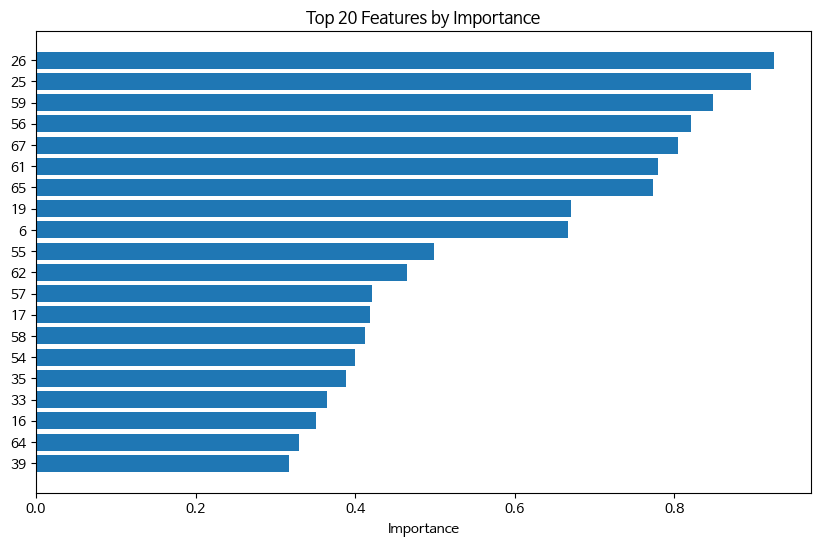

In [141]:
#중요도에 따라 변수 시각화
plt.figure(figsize=(10,6))
plt.barh(range(len(top_20_features)), top_20_importance, align='center')
plt.yticks(range(len(top_20_features)), top_20_features)
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.show()

In [ ]:
# 여러분이 알고 있는 분류 모델의 평가지표를 모두 구해보세요
# ex) accuracy, precision, recall, F1...

# Accuracy, Precision, Recall, F1 score, Error Rate, Specificity, Fall Out

In [142]:
# LinearDiscriminantAnalysis 모델의 confusion matrix를 사용하기 위하여 학습용 데이터의 예측값을 저장합니다.
model_prediction_train = clf.predict(X_train)
model_prediction_test = clf.predict(X_test)

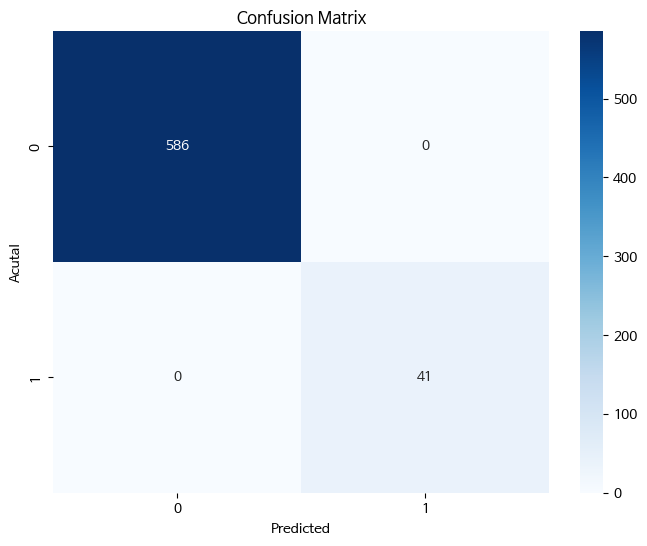

In [145]:
# confusion_matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Heatmap 그리는 함수
def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Acutal")
  plt.show()

plot_confusion_matrix(y_train, model_prediction_train)

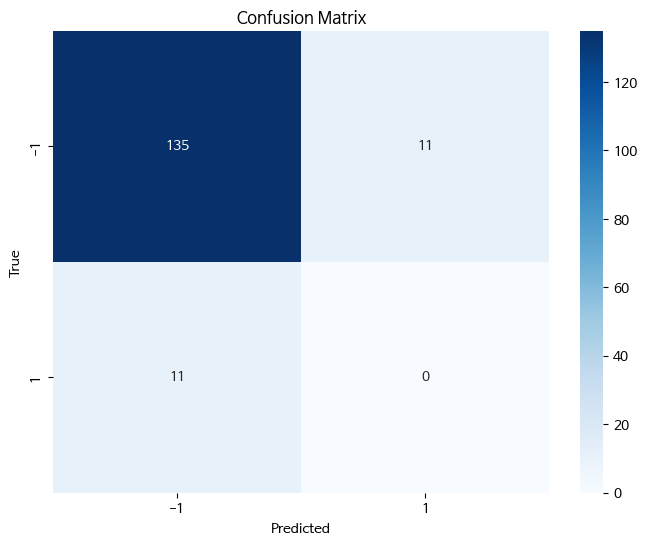

In [146]:
# LogisticRegression 모델에서 평가용 데이터(`x_test, y_test`)의 confusion matrix를 구하세요.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 생성
cm = confusion_matrix(y_test, model_prediction_test)

# 클래스 레이블
class_labels = np.unique(y_test)

# Heatmap 그리기
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()